## Gradient Boosting 
- A powerful ensemble learning technique used for regression and classification tasks, including time series forecasting. It builds models sequentially, with each new model correcting the errors of the previous one
- Gradient Boosting constructs an additive model by sequentially fitting base learners (typically decision trees) to the residuals of the previous learners. The model is built as follow:
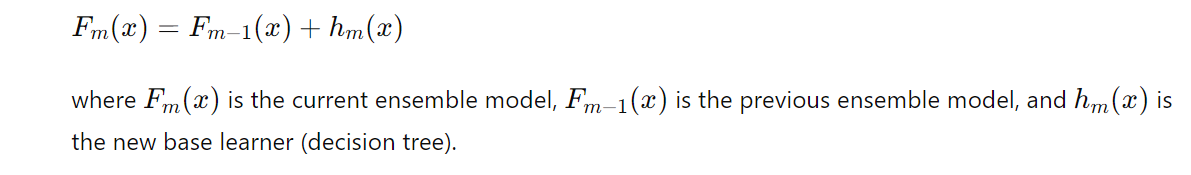

## Steps in Gradient Boosting
- Initialize the model:
The initial model is usually a simple constant model. For regression, this is often the mean of the target values.

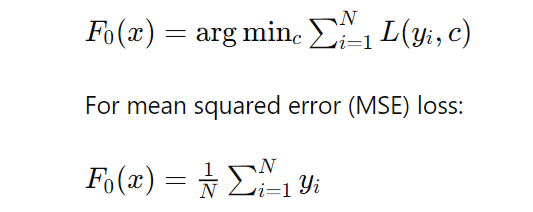

### Step 2 Iteratively add base learners:
For each iteration (𝑚) from 1 to 𝑀
- a.Compute the pseudo-residuals:
The residuals (errors) are computed as the negative gradient of the loss function with respect to the current model's predictions.


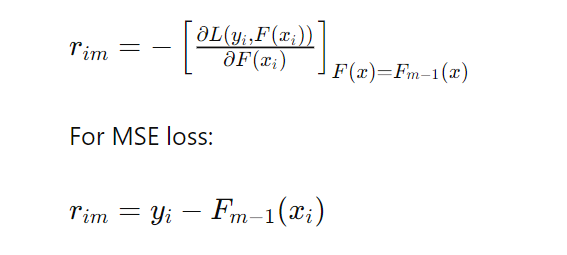

### b. Fit a new base learner to hm(x) the pseudo-residuals

- Train a decision tree to predict the pseudo-residuals
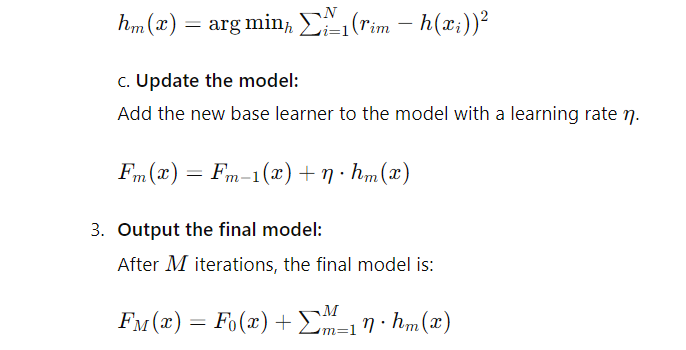

For time series forecasting, the process is similar, but the features are typically lagged values of the time series. 
## Mathematical implementation for Time Series:
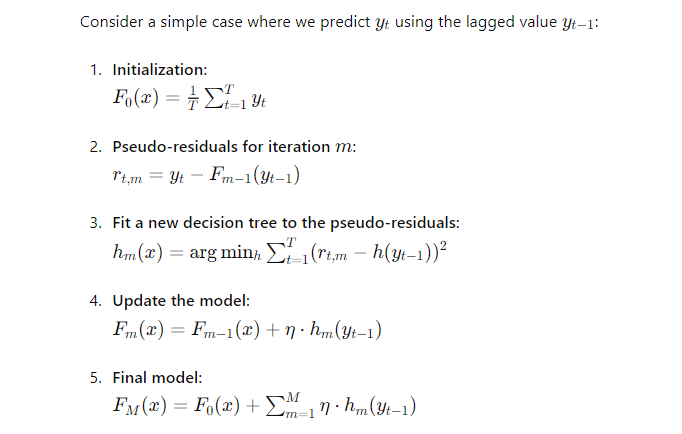

##  Decision Tree and Ensemble learning method

#### Decision Tree Example
Imagine you want to decide whether to play tennis based on weather conditions. You have the following features: Outlook, Temperature, Humidity, and Wind. The decision tree helps you make a decision based on these features.

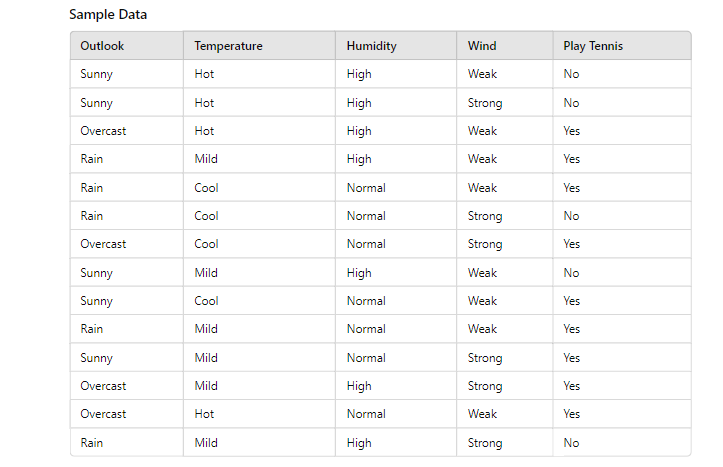

#### Decision Tree Construction
- Choose the Best Feature to Split: The feature that best separates the data (e.g., using metrics like Gini impurity or information gain).
- Split the Data: Based on the selected feature, split the data into subsets.
- Repeat the Process: Repeat the process for each subset until you reach a stopping criterion (e.g., all samples are classified, or the tree reaches a maximum depth).

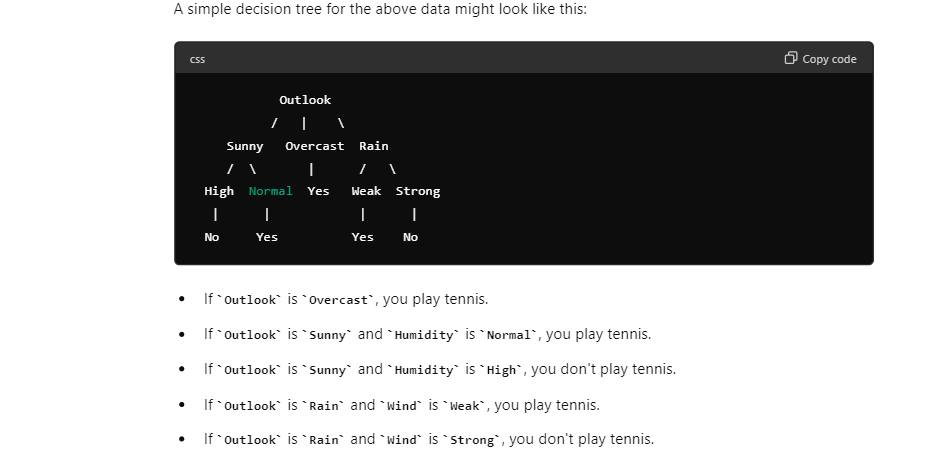

# Ensemble Learning Methods

| Method   | Description                                                                                         | Steps                                                                                                              | Example                                                                                           |
|----------|-----------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| Bagging  | Improves stability and accuracy by combining predictions of multiple models trained on different subsets of data. | 1. Create multiple subsets by sampling with replacement. <br> 2. Train a model (e.g., decision tree) on each subset. <br> 3. Aggregate predictions (e.g., majority vote for classification, average for regression). | Subsets: <br> - Tree 1: `Yes` <br> - Tree 2: `No` <br> - Tree 3: `Yes` <br> Final Prediction: `Yes` (majority vote) |
| Boosting | Combines predictions of multiple models, focusing on correcting errors of previous models.           | 1. Train a model on the dataset. <br> 2. Identify and increase weights of misclassified instances. <br> 3. Train a new model on the weighted dataset. <br> 4. Repeat the process, combining predictions.  | Steps: <br> - Model 1: `No`, `No`, `Yes` <br> - Model 2: `Yes`, `No`, `Yes` <br> - Model 3: `Yes`, `Yes`, `Yes` <br> Final Prediction: Combine predictions, often with weighted voting. |





In [1]:
##Basic example of a Decision Tree for classification.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])

In [2]:


X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6666666666666666


In [5]:
## Bagging with Decision tree 
# Train a Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f'Bagging Accuracy: {accuracy_bagging}')

Bagging Accuracy: 0.6666666666666666


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier
boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_clf.fit(X_train, y_train)

# Make predictions
y_pred_boosting = boosting_clf.predict(X_test)

# Evaluate the model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print(f'Boosting Accuracy: {accuracy_boosting}')


Boosting Accuracy: 0.6666666666666666


## GradientBoostingRegressor for Time Series Forecasting

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
# Step 1: Generate a synthetic time series dataset
def generate_synthetic_data(n_samples=1000):
    np.random.seed(42)
    time = np.arange(n_samples)
    trend = time * 0.01
    seasonality = 10 * np.sin(time * 2 * np.pi / 365)
    noise = np.random.normal(scale=0.5, size=n_samples)
    data = trend + seasonality + noise
    return data

data = generate_synthetic_data()

In [9]:
# Step 2: Prepare the dataset for time series forecasting
def create_features(data, lag=1):
    df = pd.DataFrame(data, columns=['value'])
    for i in range(1, lag+1):
        df[f'lag_{i}'] = df['value'].shift(i)
    df.dropna(inplace=True)
    return df

lag = 10
df = create_features(data, lag)
X = df.drop('value', axis=1)
y = df['value']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Train a Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [11]:

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.5474834032343827


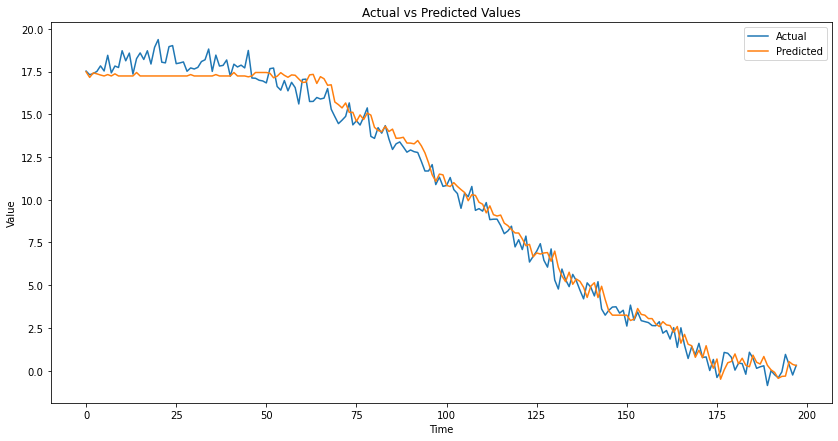

In [12]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


### The learning rate
- is a crucial hyperparameter in machine learning algorithms, particularly in gradient boosting and other iterative methods such as gradient descent. It determines the step size at each iteration while moving toward a minimum of a loss function.

## Key Points about Learning Rate:
Controls the Magnitude of Updates:

- A higher learning rate means larger steps towards the minimum, which can speed up the learning process but might overshoot the minimum.
- A lower learning rate means smaller steps, providing more precision but requiring more iterations to converge.
### Balancing Act:

- High Learning Rate: Can lead to faster convergence but might cause the algorithm to overshoot the optimal parameters or diverge.
- Low Learning Rate: Ensures stable convergence but might take a long time to reach the optimal solution, potentially getting stuck in local minima.
### Impact on Gradient Boosting:

- In gradient boosting, the learning rate (often denoted as eta or shrinkage) scales the contribution of each tree added to the model.
- Lower learning rates often require a larger number of trees (or iterations) to achieve the same performance, as each tree contributes less to the overall prediction.

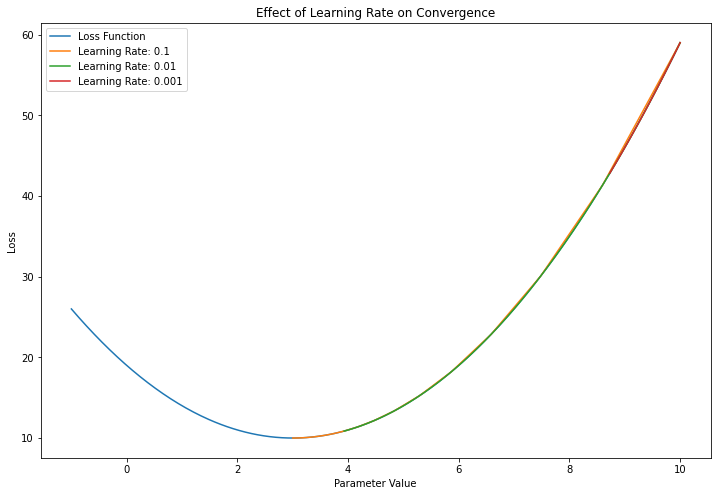

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a loss function
def loss_function(x):
    return (x - 3) ** 2 + 10

# Derivative of the loss function
def gradient(x):
    return 2 * (x - 3)

# Gradient Descent with Different Learning Rates
learning_rates = [0.1, 0.01, 0.001]
initial_x = 10
iterations = 100

plt.figure(figsize=(12, 8))
x = np.linspace(-1, 10, 400)
y = loss_function(x)
plt.plot(x, y, label='Loss Function')

for lr in learning_rates:
    x_val = initial_x
    x_history = [x_val]
    for _ in range(iterations):
        x_val -= lr * gradient(x_val)
        x_history.append(x_val)
    plt.plot(x_history, loss_function(np.array(x_history)), label=f'Learning Rate: {lr}')

plt.xlabel('Parameter Value')
plt.ylabel('Loss')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.show()
